Amirhossein Safari

97463137

NN ETH Forecast Assignment

-------------------------------------------------

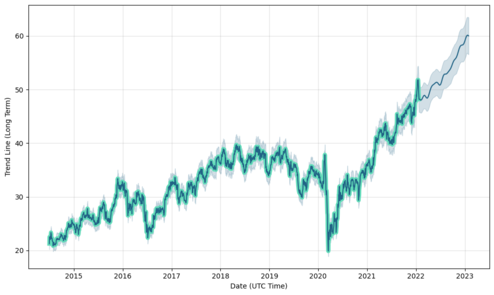

Source of image: https://walletinvestor.com/euronext-as-stock-forecast/nn-stock-prediction



dataset => [Click me:)](https://drive.google.com/file/d/1S0aVN728bjRbOvcOI4Vclwzhh_z2cQDA/view?usp=sharing)

In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.utils.vis_utils import plot_model
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv('/content/comparision.csv')

In [32]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Higher
0,12/8/2020,591.900818,594.751587,552.469238,554.827759,554.827759,14398919320,0
1,12/9/2020,554.792908,577.288391,532.998413,573.479126,573.479126,15855915840,1
2,12/10/2020,573.504028,574.600159,549.784058,559.678528,559.678528,11672582040,0
3,12/11/2020,559.679199,560.376709,537.811646,545.797363,545.797363,11098819124,0
4,12/12/2020,545.578552,573.339417,545.245605,568.567322,568.567322,8534557897,1


In [33]:
dataset = df.values
dataset

array([['12/8/2020', 591.900818, 594.751587, ..., 554.827759,
        14398919320, 0],
       ['12/9/2020', 554.792908, 577.288391, ..., 573.479126,
        15855915840, 1],
       ['12/10/2020', 573.5040280000001, 574.600159, ..., 559.678528,
        11672582040, 0],
       ...,
       ['12/6/2021', 4199.0, 4375.520508, ..., 4358.737305, 28229518513,
        1],
       ['12/7/2021', 4358.586914, 4428.589355, ..., 4315.061522999999,
        22366213354, 0],
       ['12/8/2021', 4304.434082, 4381.429688, ..., 4370.023438,
        20620898304, 1]], dtype=object)

In [34]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [35]:
X, Y

(array([[591.900818, 594.751587, 552.469238, 554.827759, 554.827759,
         14398919320],
        [554.792908, 577.288391, 532.998413, 573.479126, 573.479126,
         15855915840],
        [573.5040280000001, 574.600159, 549.784058, 559.678528,
         559.678528, 11672582040],
        ...,
        [4199.0, 4375.520508, 3930.8066409999997, 4358.737305,
         4358.737305, 28229518513],
        [4358.586914, 4428.589355, 4264.32373, 4315.061522999999,
         4315.061522999999, 22366213354],
        [4304.434082, 4381.429688, 4292.548828, 4370.023438, 4370.023438,
         20620898304]], dtype=object),
 array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 

In [36]:
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

In [37]:
X, Y

(array([[5.9190082e+02, 5.9475159e+02, 5.5246924e+02, 5.5482776e+02,
         5.5482776e+02, 1.4398920e+10],
        [5.5479291e+02, 5.7728839e+02, 5.3299841e+02, 5.7347913e+02,
         5.7347913e+02, 1.5855916e+10],
        [5.7350403e+02, 5.7460016e+02, 5.4978406e+02, 5.5967853e+02,
         5.5967853e+02, 1.1672582e+10],
        ...,
        [4.1990000e+03, 4.3755205e+03, 3.9308066e+03, 4.3587373e+03,
         4.3587373e+03, 2.8229519e+10],
        [4.3585869e+03, 4.4285894e+03, 4.2643237e+03, 4.3150615e+03,
         4.3150615e+03, 2.2366214e+10],
        [4.3044341e+03, 4.3814297e+03, 4.2925488e+03, 4.3700234e+03,
         4.3700234e+03, 2.0620898e+10]], dtype=float32),
 array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 

Fitting data => scaling data between [0,1]

In [39]:
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [40]:
X_scale

array([[0.01086232, 0.00793633, 0.00465249, 0.00211668, 0.00211668,
        0.08215456],
       [0.00216071, 0.00390449, 0.        , 0.00648849, 0.00648849,
        0.10123592],
       [0.00654837, 0.00328384, 0.00401087, 0.00325368, 0.00325368,
        0.04644946],
       ...,
       [0.85670716, 0.8808253 , 0.81189376, 0.8937367 , 0.8937367 ,
        0.26328513],
       [0.8941294 , 0.8930776 , 0.8915865 , 0.88349926, 0.88349926,
        0.18649715],
       [0.88143086, 0.88218963, 0.89833075, 0.8963821 , 0.8963821 ,
        0.16363987]], dtype=float32)

In [41]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [42]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [43]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(256, 6) (55, 6) (55, 6) (256,) (55,) (55,)


In [44]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
fit_report = model.fit(X_train, Y_train,
          batch_size=32, epochs=1000,
          validation_data=(X_val, Y_val))

Epoch 1/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.5046 - accuracy: 0.8086 - val_loss: 0.5512 - val_accuracy: 0.7091
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.5011 - accuracy: 0.8359 - val_loss: 0.5538 - val_accuracy: 0.7091
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4960 - accuracy: 0.8047 - val_loss: 0.5417 - val_accuracy: 0.7636
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.8438 - val_loss: 0.5433 - val_accuracy: 0.7091
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4925 - accuracy: 0.8320 - val_loss: 0.5356 - val_accuracy: 0.7455
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.8477 - val_loss: 0.5472 - val_accuracy: 0.7091
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.8203 - val_loss: 0.5280 - val_accuracy: 0.7636
Epoch 8/1000
8/8 [==

In [48]:
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 5ms/step - loss: 0.0637 - accuracy: 0.9636


0.9636363387107849

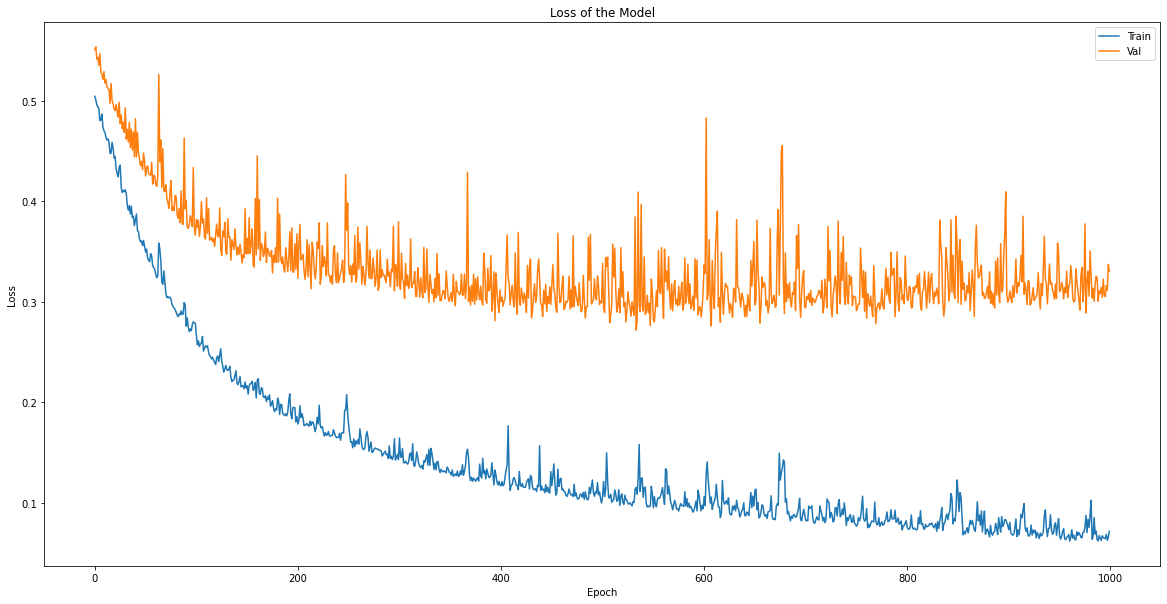

In [55]:
plt.figure(figsize=(20,10))
plt.plot(fit_report.history['loss'])
plt.plot(fit_report.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

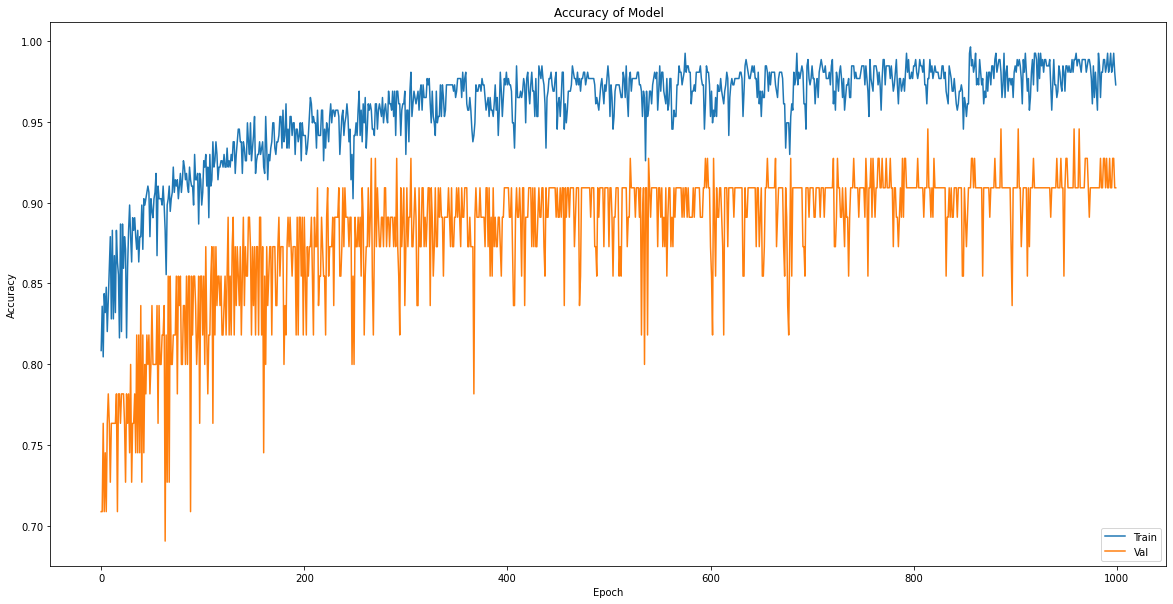

In [54]:
plt.figure(figsize=(20,10))
plt.plot(fit_report.history['accuracy'])
plt.plot(fit_report.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()